## Example: Ovarian Cancer Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib notebook

plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams.update({'font.size':18})

observations = pd.read_csv('ovariancancer_obs.csv', header=None).to_numpy()
group = pd.read_csv('ovariancancer_grp.csv')
group

,grp
0,Cancer
1,Cancer
2,Cancer
3,Cancer
4,Cancer
...,...
211,Normal
212,Normal
213,Normal
214,Normal


<IPython.core.display.Javascript object>


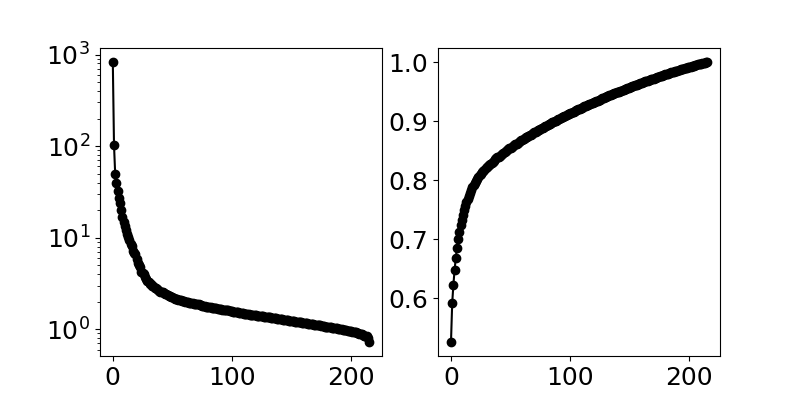

In [2]:
U, S, VT = np.linalg.svd(observations, full_matrices=False)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S, '-o', color='k')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S), '-o', color='k')

<IPython.core.display.Javascript object>


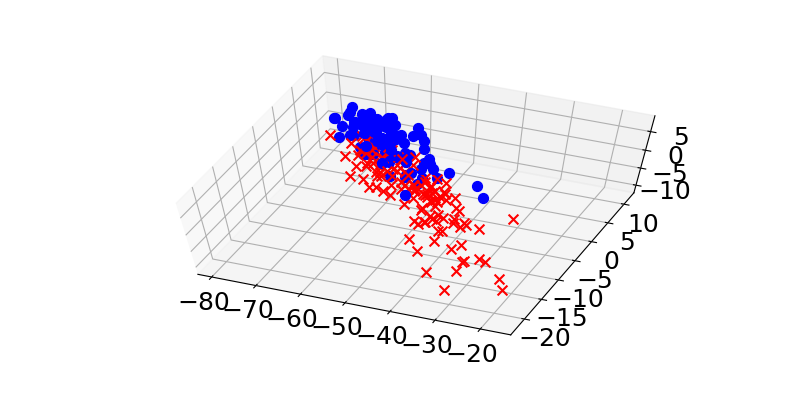

In [3]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for j in range(observations.shape[0]):
    x = VT[0,:] @ observations[j, :].T
    y = VT[1,:] @ observations[j, :].T
    z = VT[2,:] @ observations[j, :].T
    
    if group.iloc[j][0] == 'Cancer':
        ax.scatter(x, y, z, marker='x', color='r', s=50)
    else:
        ax.scatter(x, y, z, marker='o', color='b', s=50)
        
ax.view_init(35, -25)

## Conclusions
By plotting the data in a coordinate system of the first three principle components, we can see that the data might be able to be clustered according to these components